In [54]:
import pandas as pd
import joblib
from lime import lime_tabular
from tensorflow.keras.models import load_model

trade_detect = joblib.load('Autoencoder_rf.pkl')
encoder = load_model('encoder.h5')
df=pd.read_csv("Autoencoder_training.csv")
t = joblib.load('minmaxscaler.pkl')
x_test = [[0, 0, 0, 0, 0, 0, 0, 0, 30, 0.9]]
prediction = trade_detect.predict(encoder.predict(t.transform(x_test)))

x_test=pd.Series(x_test[0])
explainer = lime_tabular.LimeTabularExplainer(df.to_numpy(), mode="classification",
                                        class_names=pd.array(['Not Anomaly','Anomaly'], dtype='<U7'),
                                        feature_names=df.columns)

predict_forest = lambda x: trade_detect.predict_proba(encoder.predict(t.transform(x)))
exp = explainer.explain_instance(x_test, predict_forest, top_labels=1)
exp2 = exp.as_list()
exp = exp.as_html()

1/1 [==============================] - 0s 78ms/step


C:\Users\vinamra.khoria\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


157/157 [==============================] - 0s 901us/step


C:\Users\vinamra.khoria\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [55]:
exp2

[('0 <= 0.00', -0.05288918782942942),
 ('3 <= 0.00', -0.009489635778693665),
 ('5 <= 0.14', -0.008124820049111164),
 ('6 <= 0.19', 0.007499730948752814),
 ('7 <= 0.17', -0.0031983719663634946),
 ('4 <= 0.38', 0.0030685226861102044),
 ('1 <= 0.00', 0.0020320718047678204),
 ('2 <= 0.23', 0.0015156997601676067),
 ('8 > 0.24', -0.0012795631606785458),
 ('9 > 0.00', 0.00026346995809208197)]

In [56]:
dict = {}
dict["region"] = exp2[0][1]
dict["entity"] = exp2[1][1]
dict["counterparty"] = exp2[2][1]
dict["counterparty_type"] = exp2[3][1]
dict["broker"] = exp2[4][1]
dict["product"] = exp2[5][1]
dict["ccy_pair"] = exp2[6][1]
dict["tenor"] = exp2[7][1]
dict["amt"] = exp2[8][1]
dict["rate"] = exp2[9][1]
dict

{'region': -0.05288918782942942,
 'entity': -0.009489635778693665,
 'counterparty': -0.008124820049111164,
 'counterparty_type': 0.007499730948752814,
 'broker': -0.0031983719663634946,
 'product': 0.0030685226861102044,
 'ccy_pair': 0.0020320718047678204,
 'tenor': 0.0015156997601676067,
 'amt': -0.0012795631606785458,
 'rate': 0.00026346995809208197}

In [57]:
pos = {}
for i in dict:
    if(dict[i] >= 0):
       pos[i] = dict[i]
neg = {}
for i in dict:
    if(dict[i] < 0):
       neg[i] = -1*dict[i]
print(pos)
print(neg)

{'counterparty_type': 0.007499730948752814, 'product': 0.0030685226861102044, 'ccy_pair': 0.0020320718047678204, 'tenor': 0.0015156997601676067, 'rate': 0.00026346995809208197}
{'region': 0.05288918782942942, 'entity': 0.009489635778693665, 'counterparty': 0.008124820049111164, 'broker': 0.0031983719663634946, 'amt': 0.0012795631606785458}


# Anomaly Explanation

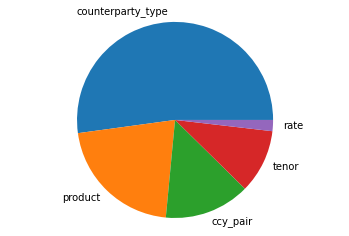

In [58]:
import matplotlib.pyplot as plt
# Data to plot
labels = []
sizes = []

for x, y in pos.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

<BarContainer object of 5 artists>

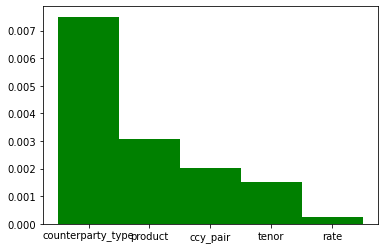

In [59]:
width = 1.0
plt.bar(pos.keys(), pos.values(), width, color='g')

# Not Anomaly Explanation

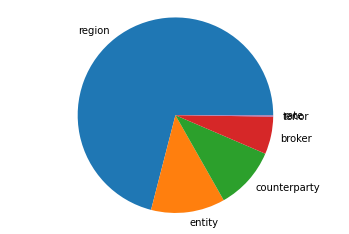

In [52]:
import matplotlib.pyplot as plt
# Data to plot
labels = []
sizes = []

for x, y in neg.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

<BarContainer object of 6 artists>

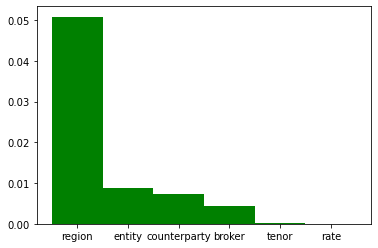

In [53]:
width = 1.0
plt.bar(neg.keys(), neg.values(), width, color='g')